# Forest Audio Classification

## Imports

In [2]:
import librosa
import librosa.display
import IPython.display as ipd # to play audio files in notebook
import pandas as pd
import numpy as np #lets us work w vector arrays
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from glob import glob # lets us list out all files in directory

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.layers import BatchNormalization, Dropout

## CSV

In [3]:
metadata = pd.read_csv('/Users/sophieli/Downloads/CongoSoundscapes.csv')

In [3]:
metadata = metadata.set_index('Site')
metadata = metadata.loc[['nn05e', 'nn06d', 'nn06f', 'nn07a', 'nn08c', 'nn10b', 'nn02a', 'nn05b', 'nn03f'], :]
# rows: 'nn05e', 'nn06d', 'nn06f', 'nn07a', 'nn08c', 'nn10b', 'nn02a', 'nn05b', 'nn03f'
# all columns

    choosing only specific forests

In [4]:
metadata

,Habitat (at recorder site),Protection
Site,,
nn05e,swamp forest,logging – active 2017-2018
nn06d,mixed forest-closed de marantacees,logging – active 2017-2018
nn06f,Gilbertiodendron (mono-dominant); very tall ca...,logging – active 2017-2018
nn07a,mixed forest-closed,logging – long inactive
nn08c,swamp forest,logging – long inactive
nn10b,Gilbertiodendron (mono-dominant); very tall ca...,logging – long inactive
nn02a,Gilbertiodendron (mono-dominant); very tall ca...,national park
nn05b,mixed forest-closed,national park
nn03f,swamp forest,national park


    Logging Active 5e [20-23] 6d [16-19] 6f [32-35]

    Logging Inactive 7a [4-7] 8c [0-3] 10b [8-11]

    National Park 2a [28-31] 5b [24-27] 3f [12-15]

## Audio Files

In [4]:
audio_files = pd.Series(glob('/Users/sophieli/Downloads/congo-forest-recordings/*/*.wav'))
print(audio_files.head())

0    /Users/sophieli/Downloads/congo-forest-recordi...
1    /Users/sophieli/Downloads/congo-forest-recordi...
2    /Users/sophieli/Downloads/congo-forest-recordi...
3    /Users/sophieli/Downloads/congo-forest-recordi...
4    /Users/sophieli/Downloads/congo-forest-recordi...
dtype: object


In [6]:
print(len(audio_files))

36


## Mel spectrogram

general terms:

    hz (frequency) = differences of wave lengths
    db/power (intensity) = amplitude (height) of the wave
    y = the audio file
    sr (sample rate) = number of times a signal is read in a second; the "resolution"

    block_length = number of frames in each block

    frame_length = number of samples per frame

    hop_length = number of samples to advance between frames

In [7]:
print(audio_files[17])

/Users/emma/Downloads/congo-forest-recordings/nn06d/nn06d_20180301_000000.wav


    stream audio in fixed-length buffers instead of as a whole (because they 24 hours long)
    convert amplitude to decibel level (db commonly used when transforming audio data)

done


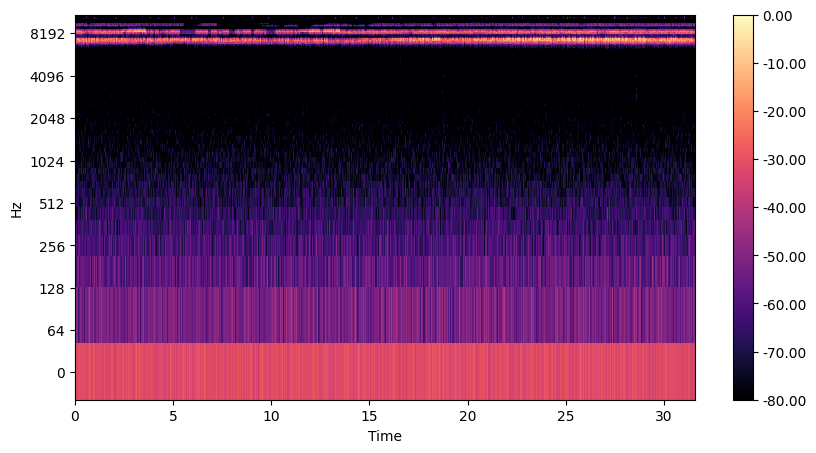

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [11]:
counter = 0
sr = librosa.get_samplerate(audio_files[17]) 
stream = librosa.stream(audio_files[17], 
                            block_length=6000, 
                            frame_length=2000, 
                            hop_length=2000,
                            offset=2000)
for y_block in stream:
    counter += 1 # my counter
    if counter == 57:
        m_block = librosa.feature.melspectrogram(y=y_block, 
                                                     sr=sr,
                                                     n_fft=2000,
                                                     hop_length=2000,
                                                     center=False)
        S_db = librosa.amplitude_to_db(np.abs(m_block), ref=np.max) 
        fig, ax = plt.subplots(figsize=(10, 5))
        img = librosa.display.specshow(S_db, x_axis= 'time', y_axis= 'log', ax=ax)
        fig.colorbar(img, ax=ax, format=f'%0.2f')
    # plt.close('all')

print("done")
# print(counter)

    logging active mixed forest-closed in March


In [9]:
print(audio_files[4])

/Users/emma/Downloads/congo-forest-recordings/nn07a/nn07a_20180301_000000.wav


done


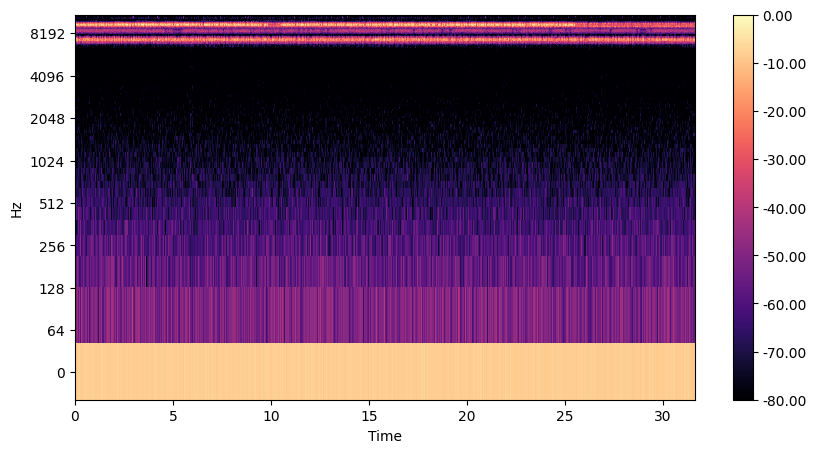

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
counter = 0
sr = librosa.get_samplerate(audio_files[4]) 
stream = librosa.stream(audio_files[4], 
                            block_length=6000, 
                            frame_length=2000, 
                            hop_length=2000,
                            offset=2000)
for y_block in stream:
    counter += 1 # my counter
    if counter == 57:
        m_block = librosa.feature.melspectrogram(y=y_block, 
                                                     sr=sr,
                                                     n_fft=2000,
                                                     hop_length=2000,
                                                     center=False)
        S_db = librosa.amplitude_to_db(np.abs(m_block), ref=np.max) 
        fig, ax = plt.subplots(figsize=(10, 5))
        img = librosa.display.specshow(S_db, x_axis= 'time', y_axis= 'log', ax=ax)
        fig.colorbar(img, ax=ax, format=f'%0.2f')
    # plt.close('all')

print("done")
# print(counter)

    logging long inactive mixed forest-closed in March

In [13]:
print(audio_files[26])

/Users/emma/Downloads/congo-forest-recordings/nn05b/nn05b_20180301_000000.wav


done


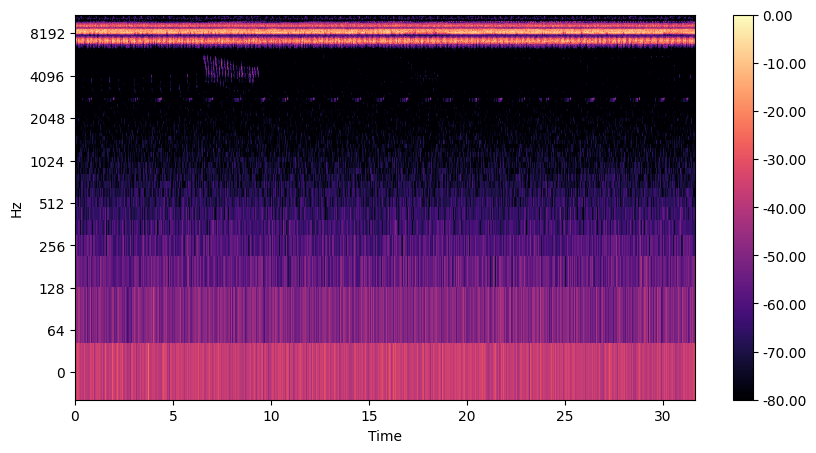

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
counter = 0
sr = librosa.get_samplerate(audio_files[26]) 
stream = librosa.stream(audio_files[26], 
                            block_length=6000, 
                            frame_length=2000, 
                            hop_length=2000,
                            offset=2000)
for y_block in stream:
    counter += 1 # my counter
    if counter == 57:
        m_block = librosa.feature.melspectrogram(y=y_block, 
                                                     sr=sr,
                                                     n_fft=2000,
                                                     hop_length=2000,
                                                     center=False)
        S_db = librosa.amplitude_to_db(np.abs(m_block), ref=np.max) 
        fig, ax = plt.subplots(figsize=(10, 5))
        img = librosa.display.specshow(S_db, x_axis= 'time', y_axis= 'log', ax=ax)
        fig.colorbar(img, ax=ax, format=f'%0.2f')
    # plt.close('all')

print("done")
# print(counter)

    national park mixed forest-closed in March

## Prep Audio

In [17]:
print("start")   
def prepare_audio(audio_file):
    list_matrices = []
    counter = 0
    sr = librosa.get_samplerate(audio_file) 
    stream = librosa.stream(audio_file, 
                            block_length=6000, 
                            frame_length=2000, 
                            hop_length=2000,
                            offset=2000)
    for y_block in stream:
        counter += 1 # my counter
        if counter <= 10 or counter > 42: # taking the nighttime values out
            m_block = librosa.feature.melspectrogram(y=y_block, 
                                                     sr=sr,
                                                     n_fft=2000,
                                                     hop_length=2000,
                                                     center=False)
            S_db = librosa.amplitude_to_db(np.abs(m_block), ref=np.max)
            list_matrices.append(S_db)
    return list_matrices
print("done")

start
done


in 1 audio file:

    total blocks: 57

    total spectrograms generated: 25

## Prep Data

In [18]:
audio = []
label = []

active_indices = [20, 21, 22, 23, 16, 17, 18, 19, 32, 33, 34, 35]
inactive_indices = [4, 5, 6, 7, 0, 1, 2, 3, 8, 9, 10, 11]
park_indices = [28, 29, 30, 31, 24, 25, 26, 27, 12, 13, 14, 15]

In [19]:
logging_active = [audio_files[index] for index in active_indices]
logging_inactive = [audio_files[index] for index in inactive_indices]
national_park = [audio_files[index] for index in park_indices]

only using certain audio files because the files collectively take up too much space
    
    specifically, 4 files for each forest--the first of March, June, September, and December
    
    spaced equally throughout the year


In [20]:
for i in range(len(logging_active)):
    audio_pieces = prepare_audio(logging_active[i])
    for j in range(len(audio_pieces)):
        if j<24:
            audio.append(audio_pieces[j])
            label.append("logging active")

print(len(audio))
print(len(label))

288
288


    only appending 24 out of 25 spectrograms because the last spectrogram has an incomplete shape

In [21]:
for i in range(len(logging_inactive)):
    audio_pieces = prepare_audio(logging_inactive[i])
    for j in range(len(audio_pieces)):
        if j<24:
            audio.append(audio_pieces[j])
            label.append("logging inactive")

print(len(audio))
print(len(label))

576
576


In [22]:
for i in range(len(national_park)):
    audio_pieces = prepare_audio(national_park[i])
    for j in range(len(audio_pieces)):
        if j<24:
            audio.append(audio_pieces[j])
            label.append("national park")

print(len(audio))
print(len(label))

864
864


    3 categories * 3 forests * 4 months * 24 spectrograms = 864 total spectrograms

In [23]:
audios = pd.Series(audio)
labels = pd.Series(label)
df = audios.to_frame(name="audio")
df["label"] = labels.to_frame(name="label")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   audio   864 non-null    object
 1   label   864 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB
None
                                               audio           label
0  [[-30.451067, -28.755363, -31.30525, -32.06366...  logging active
1  [[-46.032433, -46.445084, -47.164684, -44.7911...  logging active
2  [[-29.714626, -28.913986, -31.05489, -29.38317...  logging active
3  [[-47.63237, -53.245228, -51.36495, -51.681213...  logging active
4  [[-51.20703, -52.39926, -51.122246, -52.93611,...  logging active


    a column of spectrogram data, a column of labels

In [24]:
X=df['audio'].tolist()
y=df['label'].tolist()

In [25]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

    label encoding--convert labels into numbers

## Train Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

    split into 30% testing, 70% training

In [27]:
print(len(X_train))
print(y_train.shape)
print(len(X_test))
print(y_test.shape)

604
(604, 3)
260
(260, 3)


In [28]:
X_train = np.array(X_train)
X_train = X_train.reshape(604,128,6000,1)

print(X_train.shape)

(604, 128, 6000, 1)


In [29]:
X_test = np.array(X_test)
X_test = X_test.reshape(260,128,6000,1)

print(X_test.shape)

(260, 128, 6000, 1)


    reshape all X/spectrogram data into the spectrogram shape of (128, 6000)

In [30]:
X_train=X_train/255
X_test=X_test/255

    normalizing; pixel levels: 0-255

In [31]:
tf.compat.v1.disable_eager_execution()

## CNN (Convolutional Neural Network)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(128, 6000, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5)))
model.add(layers.Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))

model.summary()

model.call = tf.function(model.call) # <- still need?

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 5998, 32)     320       
                                                                 
 activation (Activation)     (None, 126, 5998, 32)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 2999, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 2997, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 61, 2997, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 1498, 64)

    architecture

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy']
             )

    compiling

In [34]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [71]:
#train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=10)

Train on 604 samples, validate on 260 samples


2023-02-28 09:39:02.904174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 09:39:03.983010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20


2023-02-28 09:39:05.463489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 09:39:05.507783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


604/604 [==============================] - ETA: 0s - loss: 1.5584 - accuracy: 0.3560

2023-02-28 09:41:21.777359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


604/604 [==============================] - 146s 241ms/sample - loss: 1.5584 - accuracy: 0.3560 - val_loss: 1.4680 - val_accuracy: 0.3538
Epoch 2/20
604/604 [==============================] - 144s 238ms/sample - loss: 1.1534 - accuracy: 0.3493 - val_loss: 1.3233 - val_accuracy: 0.3577
Epoch 3/20
604/604 [==============================] - 143s 237ms/sample - loss: 1.1374 - accuracy: 0.3825 - val_loss: 1.0620 - val_accuracy: 0.4231
Epoch 4/20
604/604 [==============================] - 144s 238ms/sample - loss: 1.1247 - accuracy: 0.3907 - val_loss: 1.1257 - val_accuracy: 0.4077
Epoch 5/20
604/604 [==============================] - 145s 239ms/sample - loss: 1.0897 - accuracy: 0.4288 - val_loss: 1.0680 - val_accuracy: 0.4577
Epoch 6/20
604/604 [==============================] - 144s 239ms/sample - loss: 0.9818 - accuracy: 0.5166 - val_loss: 1.4021 - val_accuracy: 0.3462
Epoch 7/20
604/604 [==============================] - 144s 238ms/sample - loss: 0.9507 - accuracy: 0.5546 - val_loss: 1.351

    training

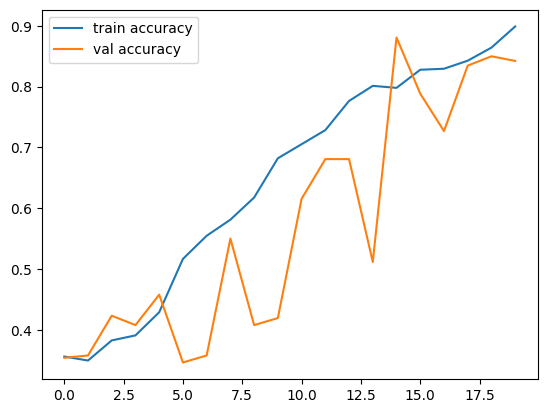

AttributeError: module 'matplotlib' has no attribute 'pyplot'

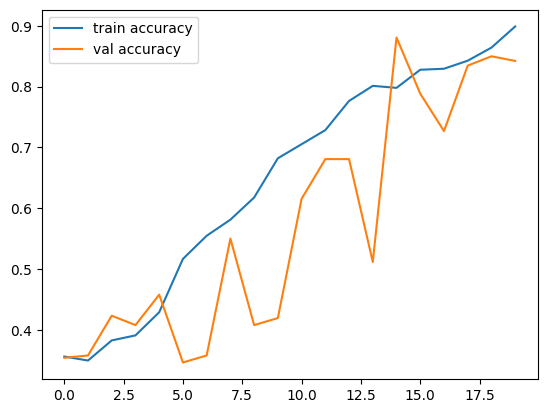

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [73]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
# plt.close('all')

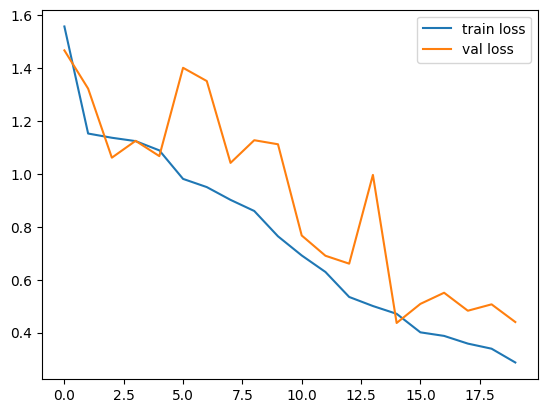

AttributeError: module 'matplotlib' has no attribute 'pyplot'

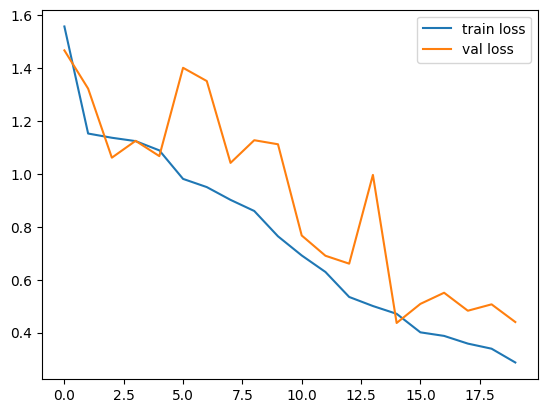

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [75]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
# plt.close('all')
